In [19]:
import matplotlib.pyplot as plt
import numpy as np
from parse_graph import profile_activation_memory, profile_gradient_memory, parse_graph_file

def plot_feature_maps_and_gradients(feature_maps, gradients):
    # Create an x-axis based on the number of operations (length of the lists).
    x = range(len(feature_maps))
    
    # Plot feature maps in green
    plt.plot(x, feature_maps, label='feature maps', color='green')
    # Plot gradients in orange
    plt.plot(x, gradients, label='gradients', color='orange')
    
    # Label axes
    plt.xlabel('Operations')
    plt.ylabel('Memory (Bytes)')
    
    # Add a title if desired
    plt.title('Memory Usage vs. Operations')
    
    # Show legend
    plt.legend()
    
    # Display the plot
    plt.show()
    
def compute_max_mem_consumption(feature_maps, gradients):
    total_mem = feature_maps + gradients
    return max(total_mem), np.argmax(total_mem)

In [27]:
filename = 'output.txt'  # Update the path if necessary.
node_list = parse_graph_file(filename)
# for node in node_list:
    # print(node)

feature_maps = profile_activation_memory(node_list)
# print("\nFeature Maps:")
# print(feature_maps)

gradients = profile_gradient_memory(node_list)
# print("\nGradients:")
# print(gradients)

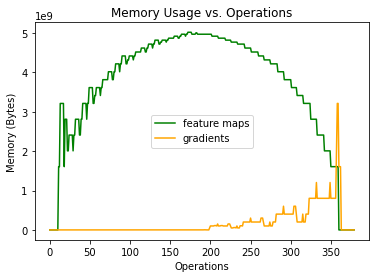

(5020585984, 472)

In [28]:
plot_feature_maps_and_gradients(feature_maps[300:680], gradients[300:680])

compute_max_mem_consumption(feature_maps, gradients)

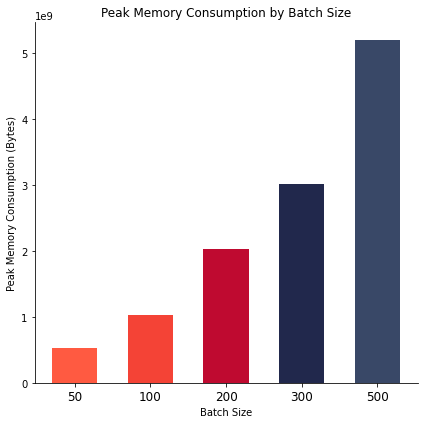

In [34]:
# Data (5 bars). Replace these with your own as needed:
batch_sizes = [50, 100, 200, 300, 500]
peak_memory_bytes = [533388120, 1023533280, 2026584064, 3019203072, 5205858984]

# We'll give each bar a custom color similar to the sample image (4 bars).
# For the 5th bar, pick a similar or distinct color.
bar_colors = ["#FF5A41", "#F44336", "#BF0A30", "#21284C", "#394867"]

# Create a figure with white background
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

# Positions for each bar on the x-axis
x_positions = range(len(batch_sizes))

# Plot the bars
ax.bar(x_positions, peak_memory_bytes, color=bar_colors, width=0.6)

# Label the x-axis categories (could be "A", "B", "C", "D", etc.)
# Here, we'll just reuse the batch_sizes or any custom labels:
ax.set_xticks(x_positions)
ax.set_xticklabels(["50", "100", "200", "300", "500"], fontsize=12, color="#000000")

# Remove the top and right spines for a cleaner look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# (Optional) Remove or fade out the left/bottom spines for an even cleaner look:
# ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

# Remove the grid
ax.grid(False)

# (Optional) Remove y-axis ticks and labels if you want them hidden:
# ax.set_yticks([])

# (Optional) If you want a fixed y-axis range, set it here:
# ax.set_ylim([0, max(peak_memory_bytes)*1.1])

# (Optional) Add numeric labels on top of each bar
"""
for x, val in zip(x_positions, peak_memory_bytes):
    ax.text(
        x, 
        val, 
        f"{val}", 
        ha="center", 
        va="bottom", 
        fontsize=9, 
        color="#000000"
    )
"""
# Label the axes and chart
plt.xlabel("Batch Size")
plt.ylabel("Peak Memory Consumption (Bytes)")
plt.title("Peak Memory Consumption by Batch Size")

# Show the final plot
plt.tight_layout()
plt.show()